# Tarefa analítica de datos CityBikes

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [105]:
# df_bikes=pd.read_csv('../datasets/stations.csv')
df_bikes=pd.read_csv('datasets/bicicorunha_data.csv')
df_bikes.drop(columns=['Unnamed: 0'], inplace=True)
df_bikes.head()

,id,name,timestamp,free_bikes,empty_slots,uid,last_updated,slots,normal_bikes,ebikes
0,023efce1bbb332a1b918d56aeb671890,Avenida de Arteixo,2024-12-08T15:42:39.108553Z,8,7,53,1733672393,15,8,0
1,02cecd02915c86d7ab8034b61b19da0e,Mercado de Monte Alto,2024-12-08T15:42:39.108441Z,0,14,43,1733672357,15,0,0
2,030c4027b0bea390e562645c7082db4c,Los Rosales,2024-12-08T15:42:39.108049Z,5,20,11,1733672462,25,3,2
3,0e3aa0134a2f3d07ae5bd093e6af9a33,Plaza de Portugal,2024-12-08T15:42:39.108579Z,7,13,55,1733672439,20,7,0
4,104e0797759d11ac22a61cfed357800b,Ventorrillo,2024-12-08T15:42:39.108261Z,12,7,27,1733672469,19,11,1


#### **1. Elimina rexistros duplicados.**

* Cada canto tempo se tomaron os datos da API?

* Cada canto tempo pensas que se actualizan os datos?

* En que porcentaxe puideches reducir os datos despois de eliminar rexistros duplicados?


In [106]:
#Deleting duplicated registers
original_length=len(df_bikes)
df_bikes= df_bikes.drop_duplicates(keep='first')
current_length=len(df_bikes)


In [107]:
print('Length citybikes before depurations:', original_length)
print('Length citybikes after depurations:', current_length)
print('Porcentage reduction:', (original_length-current_length)/original_length*100)


Length citybikes before depurations: 1333829
Length citybikes after depurations: 890281
Porcentage reduction: 33.25373792292715


In [108]:
#Updates between data
df_bikes['timestamp'] = pd.to_datetime(df_bikes['timestamp'], format='ISO8601')
df_hercules=df_bikes[df_bikes['name']=='Torre de Hércules']
seconds_mean = df_hercules['timestamp'].diff().dt.total_seconds().mean()
print('Data has been updated every: ' + str(round(seconds_mean/60, 2))+' minutes.')

Data has been updated every: 3.0 minutes.


#### **2. Evolución viaxes**
Mostra a evolución ao longo do tempo da dispoñibilidade de bicicletas (gráfico de liña) nunha estación que escollas

In [109]:
df_hercules = df_hercules.set_index('timestamp')

<Axes: title={'center': 'Dispoñibilidade bicicletas Torre de Hérculos'}, xlabel='Tempo', ylabel='Bicicletas dispoñibles'>

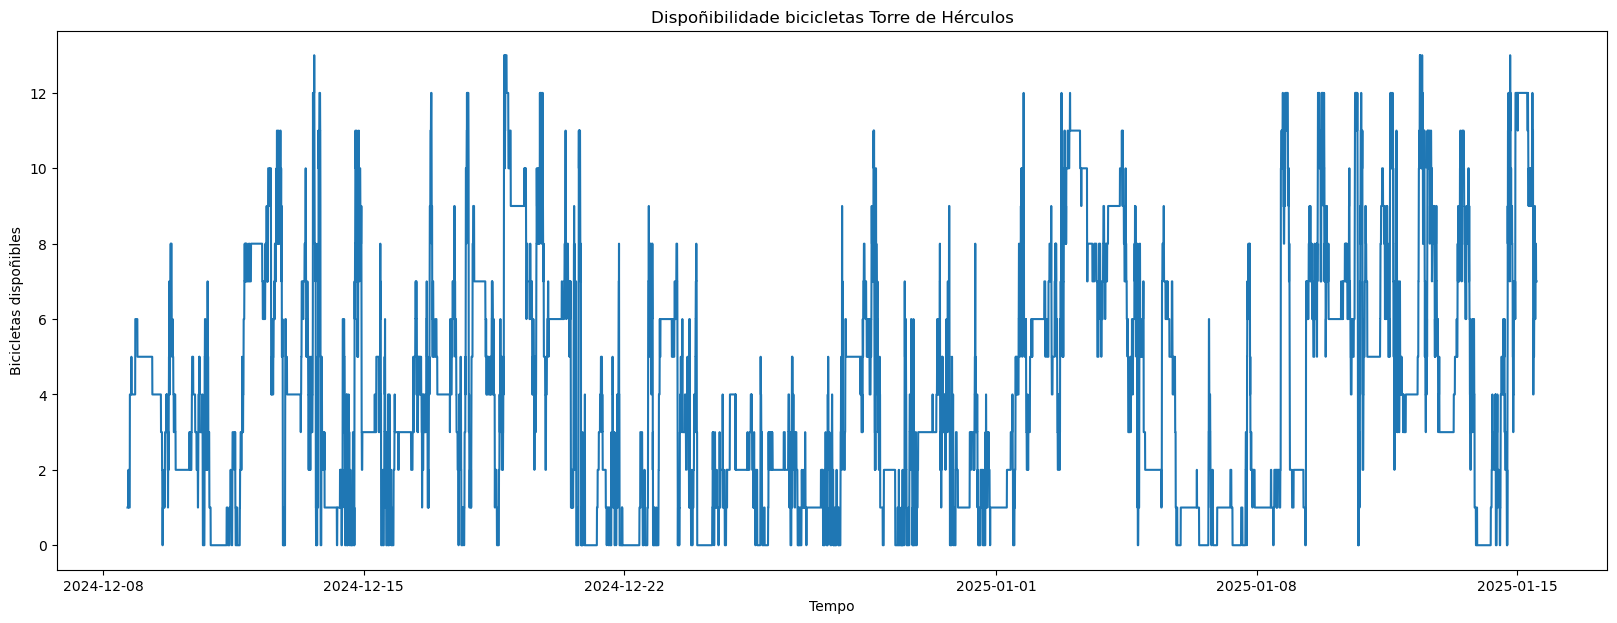

In [110]:
plt.figure(figsize=(20,7))
plt.xlabel("Tempo")  
plt.ylabel("Bicicletas dispoñibles")  
plt.title("Dispoñibilidade bicicletas Torre de Hérculos") 
sns.lineplot(data=df_hercules.free_bikes)

#### **3. Evolución entre estacións**

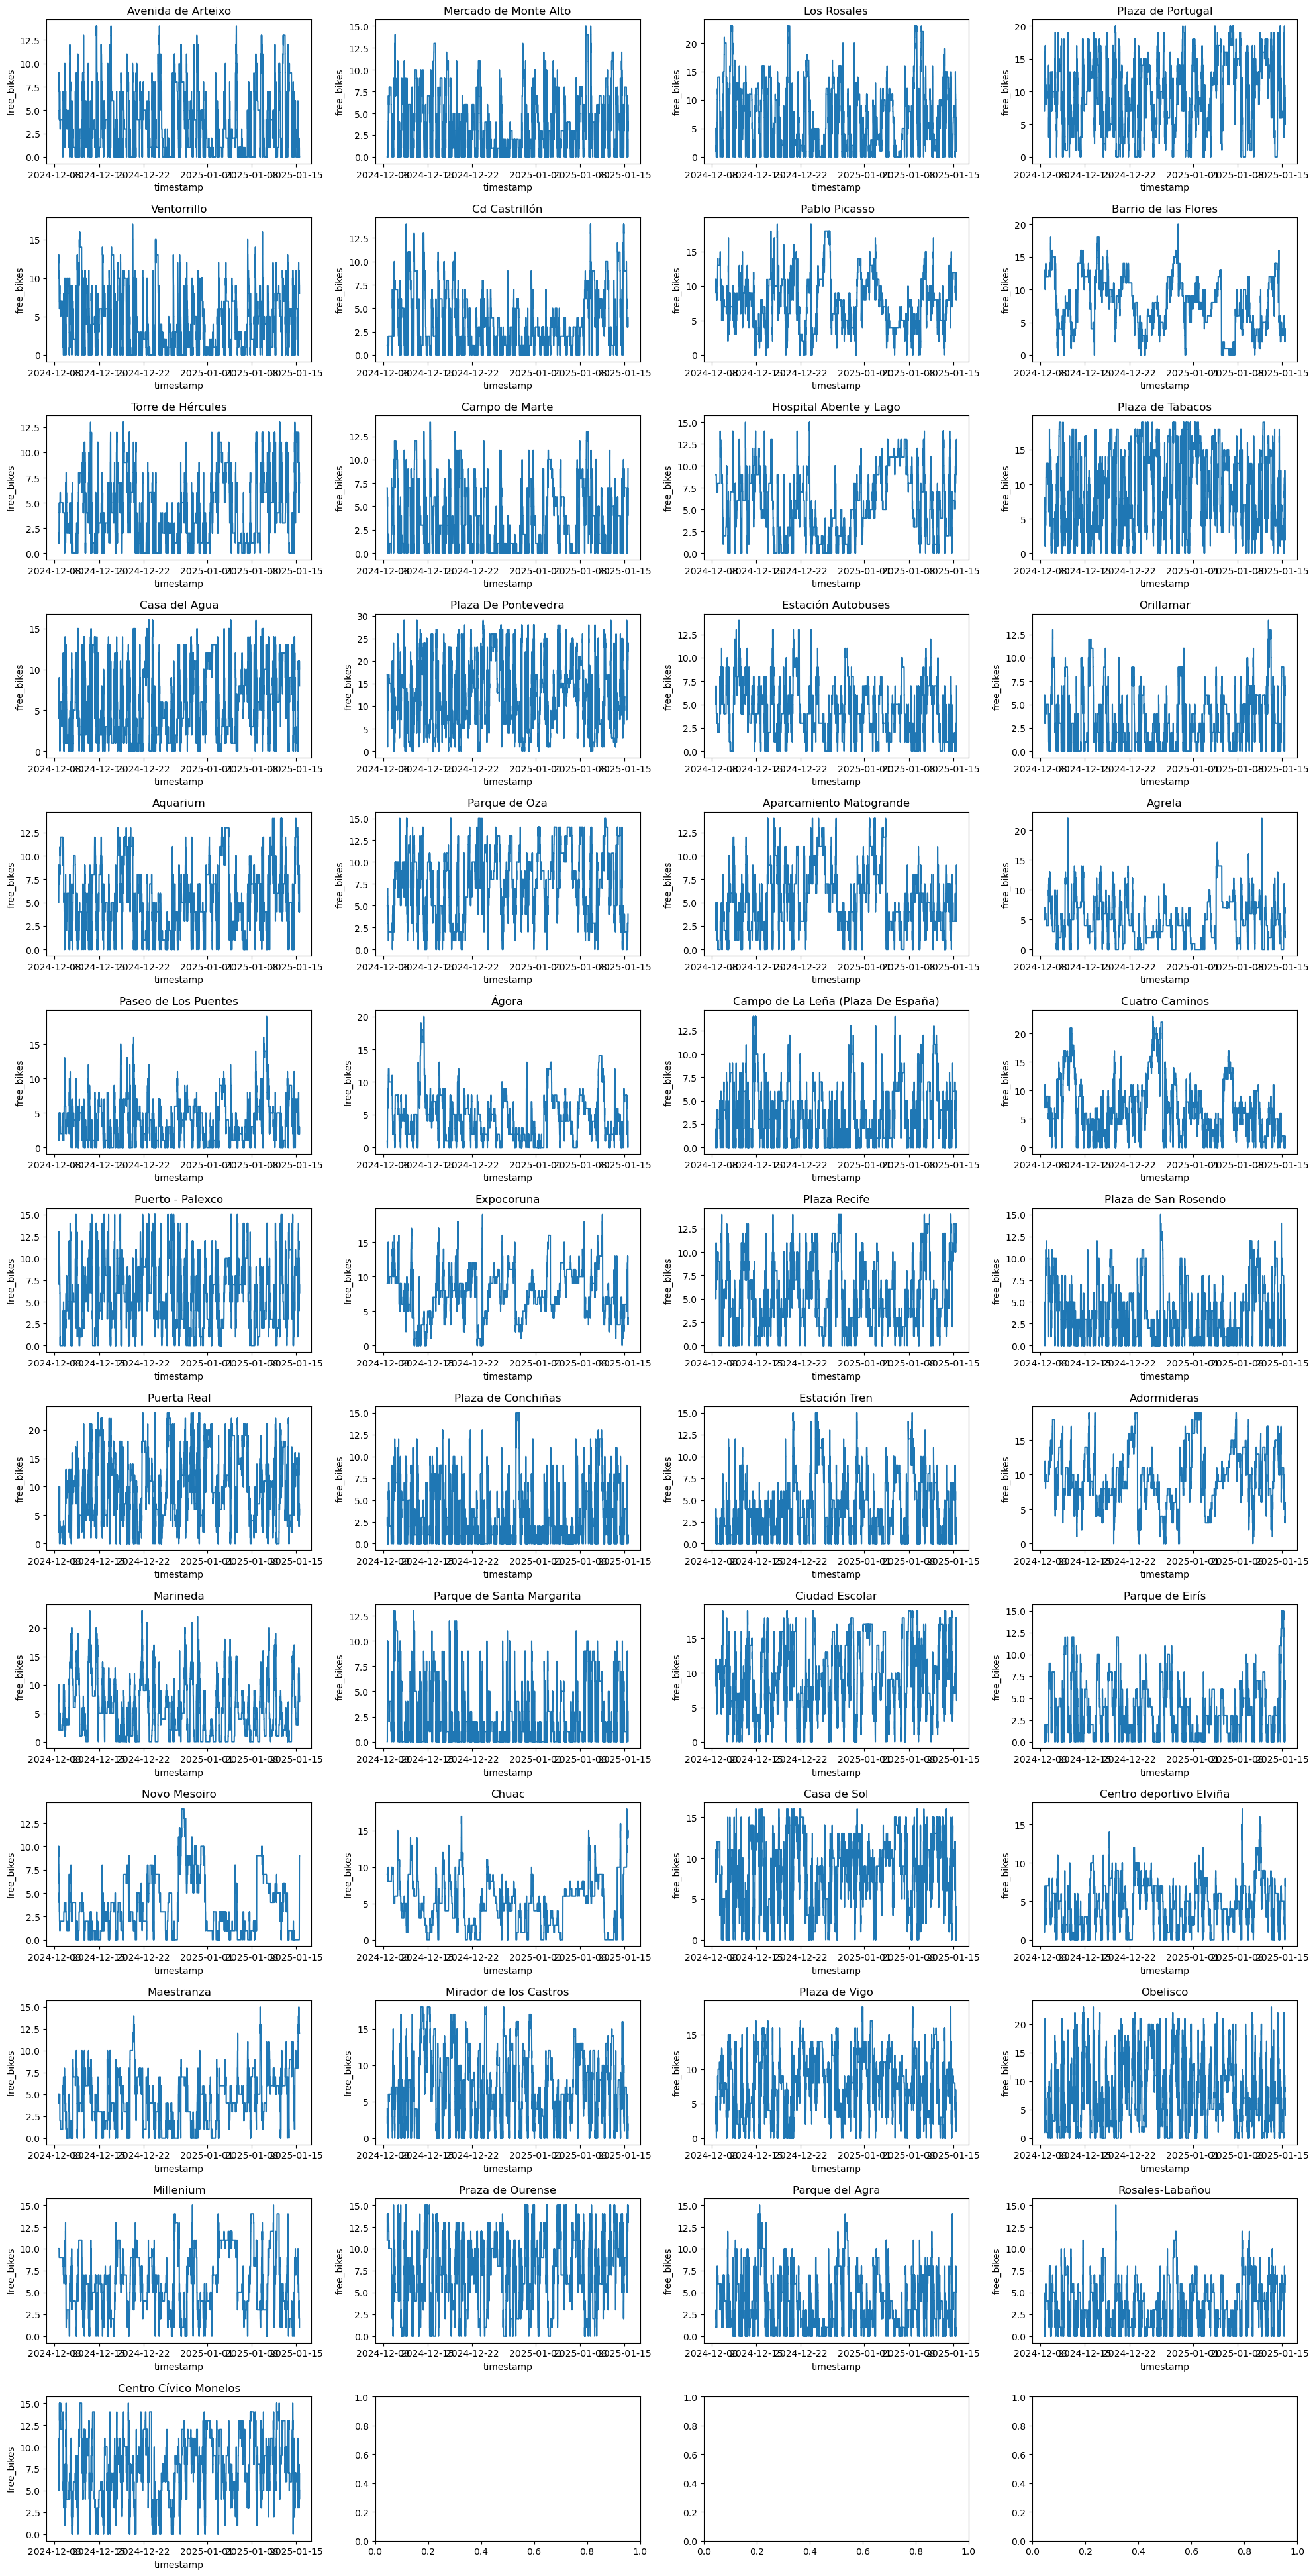

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

total_stations = df_bikes['name'].unique()
n_rows = int(np.ceil(len(total_stations) / 4))
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))
axes = axes.flatten()

for i, station in enumerate(total_stations):
    df_station = df_bikes[df_bikes['name'] == station]
    sns.lineplot(data=df_station, x='timestamp', y='free_bikes', ax=axes[i])
    axes[i].set_title(station)

plt.tight_layout()
plt.show()


#### **4. Eléctricas vs Mecánicas** 
Ver evolución no tempo da dispoñibilidade de bicis segundo o tipo (eléctrica ou mecánica) (area apilada?) de varias estacións da túa elección.

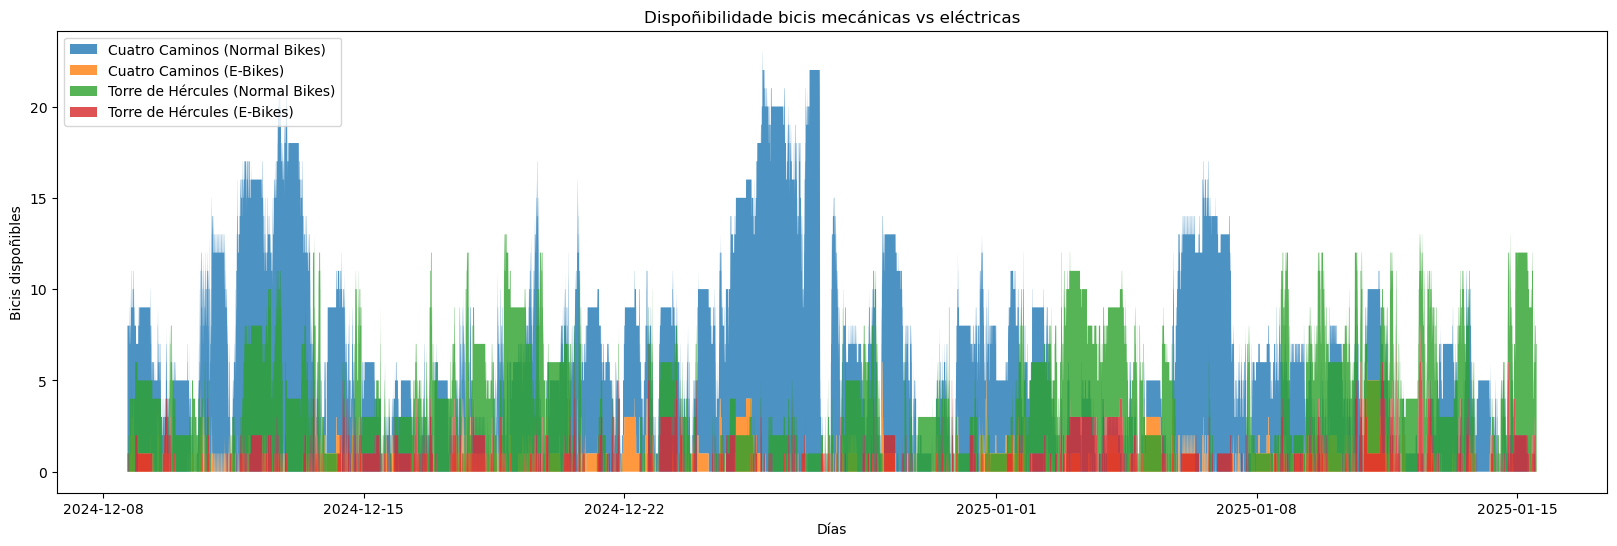

In [148]:
df_some_stations = df_bikes[df_bikes['name'].isin(['Cuatro Caminos', 'Torre de Hércules'])]

plt.figure(figsize=(20, 6))

for name, group in df_some_stations.groupby("name"):
    plt.fill_between(group["timestamp"], group["normal_bikes"] + group["ebikes"], group["ebikes"], alpha=0.8, label=f"{name} (Normal Bikes)")
    plt.fill_between(group["timestamp"], group["ebikes"], alpha=0.8, label=f"{name} (E-Bikes)")

plt.legend(loc="upper left")
plt.xlabel("Días")
plt.ylabel("Bicis dispoñibles")
plt.title("Dispoñibilidade bicis mecánicas vs eléctricas")
plt.show()


#### **5. Medias de uso por horas en Cuatro Caminos**
Ver a evolución no tempo da dispoñibilidade de bicis por horas (utilizar medias?). A idea sería respostar á pregunta: en que horas teño maior dispoñibilidade? En que horas é máis difícil coller unha bici nesta estación?

In [113]:

df_4caminos=df_bikes[df_bikes['name']=='Cuatro Caminos'][['free_bikes', 'timestamp']]
print(type(df_4caminos))

try:
    df_4caminos = df_4caminos.set_index('timestamp')
except Exception as e:
    #timestamp has already been set as index
    pass

sample=df_4caminos.sample(1)
sample.index.time
sample.sample(1)

time_slots = [
    {'init': '00:00:00', 'end': '01:00:00'},
    {'init': '01:00:00', 'end': '02:00:00'},
    {'init': '02:00:00', 'end': '03:00:00'},
    {'init': '03:00:00', 'end': '04:00:00'},
    {'init': '04:00:00', 'end': '05:00:00'},
    {'init': '05:00:00', 'end': '06:00:00'},
    {'init': '06:00:00', 'end': '07:00:00'},
    {'init': '07:00:00', 'end': '08:00:00'},
    {'init': '08:00:00', 'end': '09:00:00'},
    {'init': '09:00:00', 'end': '10:00:00'},
    {'init': '10:00:00', 'end': '11:00:00'},
    {'init': '11:00:00', 'end': '12:00:00'},
    {'init': '12:00:00', 'end': '13:00:00'},
    {'init': '13:00:00', 'end': '14:00:00'},
    {'init': '14:00:00', 'end': '15:00:00'},
    {'init': '15:00:00', 'end': '16:00:00'},
    {'init': '16:00:00', 'end': '17:00:00'},
    {'init': '17:00:00', 'end': '18:00:00'},
    {'init': '18:00:00', 'end': '19:00:00'},
    {'init': '19:00:00', 'end': '20:00:00'},
    {'init': '20:00:00', 'end': '21:00:00'},
    {'init': '21:00:00', 'end': '22:00:00'},
    {'init': '22:00:00', 'end': '23:00:00'},
    {'init': '23:00:00', 'end': '00:00:00'}
]

df_times=pd.DataFrame(columns=['times', 'free_bikes'])

for slot in time_slots:
    grouped_by_time=df_4caminos.between_time(slot['init'], slot['end'])
    grouped_by_day = grouped_by_time.groupby(grouped_by_time.index.date).mean()
    mean_all_days = grouped_by_day['free_bikes'].mean()
    formated_date=slot['init'][:2]+'-'+slot['end'][:2]
    df_times.loc[len(df_times)]=[formated_date, mean_all_days]
plt.figure(figsize=(20,7))

plt.xlabel('Franxas horarias')
plt.ylabel('Bicicletas libres')
plt.title('Cuatro caminos: bicicletas libres segundo franxa horaria')
sns.lineplot(data=df_times, x='times', y='free_bikes')

TypeError: 'str' object is not callable

#### **6. Viaxes por día**
Visualiza a cantidade de viaxes por día.

In [ ]:
try:
    df_bikes=df_bikes.set_index('timestamp')
except Exception as e:
    pass
df_by_day= df_bikes[df_bikes.index.date==pd.to_datetime('2024-12-31').date()]
df_trips=pd.DataFrame(columns=['name', 'trips'])
stations_names=df_bikes['name'].unique()

for station in stations_names:
    bike_data=df_by_day[df_by_day['name']==station]['free_bikes'].to_numpy()
    precedent=0
    trips=0
    for bike in bike_data:
        if precedent>bike:
            trips+=precedent-bike
        precedent=bike
    df_trips.loc[len(df_trips)]=[station, trips]
df_trips['trips'].sum()
df_trips.head()

print(df_bikes.sample(1).index.day_name()[0])



Tuesday


39

In [ ]:
try:
    df_bikes=df_bikes.set_index('timestamp')
except Exception as e:
    pass

df_trips_by_day=pd.DataFrame(columns=['date', 'name', 'trips'])
stations_names=df_bikes['name'].unique()
print(df_bikes.head(1).index)
print(df_bikes.tail(1).index)

unique_dates = pd.Series(df_bikes.index.date).unique()

for date in unique_dates:
    df_by_day= df_bikes[df_bikes.index.date==pd.to_datetime(date).date()]
    for station in stations_names:
        bike_data=df_by_day[df_by_day['name']==station]['free_bikes'].to_numpy()
        precedent=0
        trips=0
        for bike in bike_data:
            if precedent>bike:
                trips+=precedent-bike
            precedent=bike
        df_trips_by_day.loc[len(df_trips_by_day)]=[date, station, trips]


DatetimeIndex(['2024-12-08 15:42:39.108553+00:00'], dtype='datetime64[ns, UTC]', name='timestamp', freq=None)
DatetimeIndex(['2025-01-15 12:27:51.746782+00:00'], dtype='datetime64[ns, UTC]', name='timestamp', freq=None)


In [ ]:
try:
    df_trips_by_day=df_trips_by_day.set_index('date')
    df_trips_by_day['date']=  pd.to_datetime(df_trips_by_day['date'], format='ISO8601')
except Exception as e:
    pass
df_trips_by_day = df_trips_by_day.groupby(df_trips_by_day.index)['trips'].sum().to_frame()
df_trips_by_day
df_day_week=df_trips_by_day.groupby(df_trips_by_day.index.day_name())['trips'].mean().to_frame()
df_day_week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar el DataFrame para que siga el orden de los días de la semana
df_day_week = df_day_week.reindex(days_order)
df_day_week

<Axes: xlabel='date', ylabel='trips'>

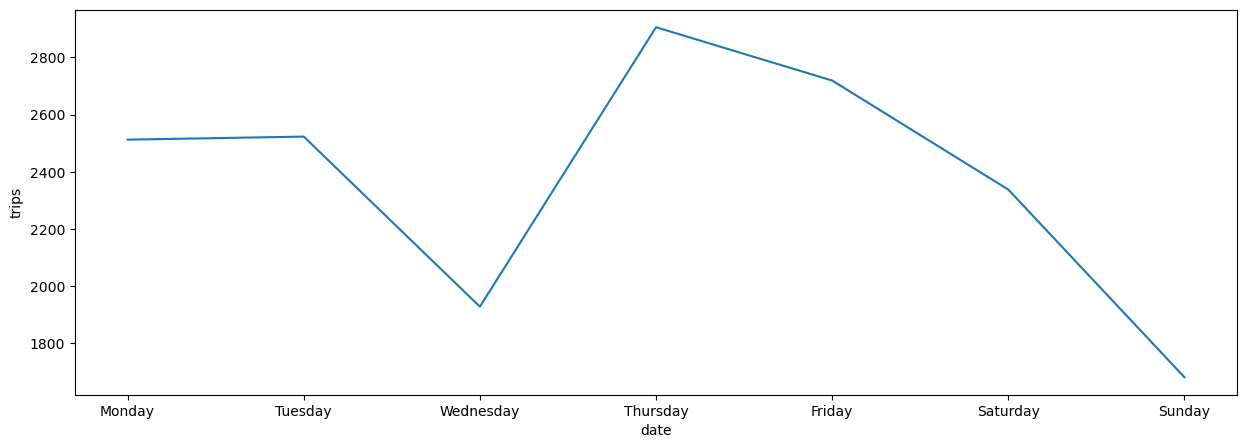

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day_week.trips)

#### **7. Viaxes por día según tipo de bicicleta**
Visualiza a cantidade de viaxes por día, en función do tipo de bicicleta.


In [ ]:
df_bikes.head()

,id,name,free_bikes,empty_slots,uid,last_updated,slots,normal_bikes,ebikes
timestamp,,,,,,,,,
2024-12-08 15:42:39.108553+00:00,023efce1bbb332a1b918d56aeb671890,Avenida de Arteixo,8,7,53,1733672393,15,8,0
2024-12-08 15:42:39.108441+00:00,02cecd02915c86d7ab8034b61b19da0e,Mercado de Monte Alto,0,14,43,1733672357,15,0,0
2024-12-08 15:42:39.108049+00:00,030c4027b0bea390e562645c7082db4c,Los Rosales,5,20,11,1733672462,25,3,2
2024-12-08 15:42:39.108579+00:00,0e3aa0134a2f3d07ae5bd093e6af9a33,Plaza de Portugal,7,13,55,1733672439,20,7,0
2024-12-08 15:42:39.108261+00:00,104e0797759d11ac22a61cfed357800b,Ventorrillo,12,7,27,1733672469,19,11,1


In [ ]:
try:
    df_bikes=df_bikes.set_index('timestamp')
except Exception as e:
    pass

df_trips_by_day=pd.DataFrame(columns=['date', 'name', 'trips_normal_bikes', 'trips_ebikes'])
stations_names=df_bikes['name'].unique()
print(df_bikes.head(1).index)
print(df_bikes.tail(1).index)

unique_dates = pd.Series(df_bikes.index.date).unique()

for date in unique_dates:
    df_by_day= df_bikes[df_bikes.index.date==pd.to_datetime(date).date()]
    for station in stations_names:
        trips_type={}
        for type in ['normal_bikes', 'ebikes']:
            bike_data=df_by_day[df_by_day['name']==station][type].to_numpy()
            precedent=0
            trips=0
            for bike in bike_data:
                if precedent>bike:
                    trips+=precedent-bike
                precedent=bike
            trips_type[type]=trips
        df_trips_by_day.loc[len(df_trips_by_day)]=[date, station, trips_type['normal_bikes'], trips_type['ebikes'] ]

DatetimeIndex(['2024-12-08 15:42:39.108553+00:00'], dtype='datetime64[ns, UTC]', name='timestamp', freq=None)
DatetimeIndex(['2025-01-15 12:27:51.746782+00:00'], dtype='datetime64[ns, UTC]', name='timestamp', freq=None)


In [ ]:
df_trips_by_day
try:
    df_trips_by_day['date']=  pd.to_datetime(df_trips_by_day['date'], format='ISO8601')
    df_trips_by_day=df_trips_by_day.set_index('date')
except Exception as e:
    pass
df_trips_by_day = df_trips_by_day.groupby(df_trips_by_day.index)[['trips_normal_bikes', 'trips_ebikes']].sum()
# df_trips_by_day
df_day_week=df_trips_by_day.groupby(df_trips_by_day.index.day_name())[['trips_normal_bikes', 'trips_ebikes']].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar el DataFrame para que siga el orden de los días de la semana
df_day_week = df_day_week.reindex(days_order)
df_day_week

,trips_normal_bikes,trips_ebikes
date,,
Monday,1350.500000,1322.000000
Tuesday,1340.333333,1351.333333
Wednesday,924.000000,1093.833333
Thursday,1573.800000,1546.200000
Friday,1349.200000,1547.800000
Saturday,1112.200000,1334.200000
Sunday,826.333333,913.500000


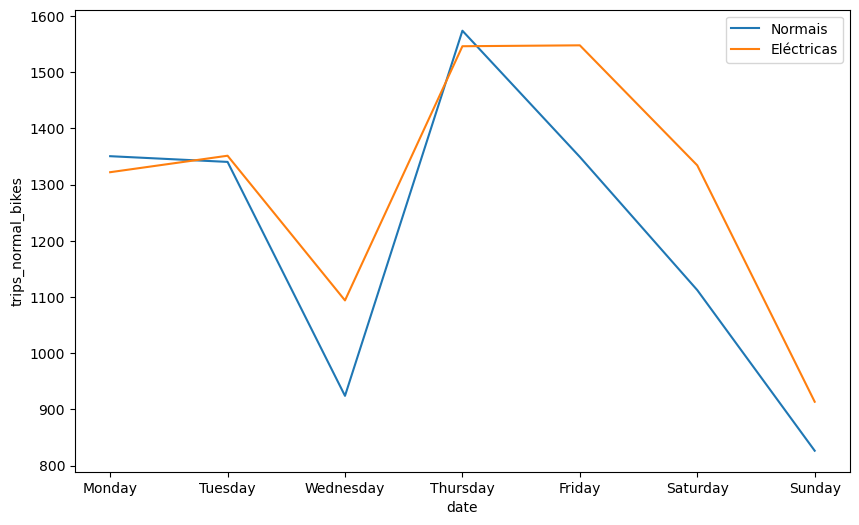

In [ ]:
plt.figure(figsize=(10, 6))
# df.index.name = 'index'
sns.lineplot( data=df_day_week, y='trips_normal_bikes', x='date', label='Normais')
sns.lineplot( data=df_day_week, y='trips_ebikes', x='date', label='Eléctricas')
plt.legend()

#### **8. Viaxes por día según tipo de bicicleta**
Dependendo número de viaxes por día co tempo atmosférico (cruzar con datos de Metostat)
https://meteostat.net/es/place/es/a-coruna?s=08001&t=2025-01-17/2025-01-24



In [163]:
url='https://meteostat.net/es/place/es/a-coruna?s=08001&t=2024-12-16/2024-12-23'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
web=requests.get(url, headers=headers)

soup=BeautifulSoup(web.content, 'html.parser')
precip_table=soup.select_one("#prcp")
print(precip_table)
soup

None


<!DOCTYPE html>

<html class="h-100" data-head-attrs="lang" lang="es">
<head>
<meta charset="utf-8"/>
<link href="/favicon.ico" rel="icon"/>
<link href="https://media.meteostat.net/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="https://media.meteostat.net/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="https://media.meteostat.net/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="#0678BE" name="theme-color"/>
<meta content="Meteostat" name="og:site_name"/>
<meta content="index,follow,max-image-preview:large" name="robots"/>
<meta content="@meteost" name="twitter:site"/>
<script type="text/javascript">
      var _paq = window._paq = window._paq || [];
      _paq.push(['disableCookies']);
      _paq.push(['enableLinkTracking']);
      (function() {
        var u="//analytics.meteostat.org/";
        _paq.push(['setTrackerUrl', u+'matomo